This notebook is for the ibm capstone project to build a model to predeict the severtiy on an accident

In [4]:
import pandas as pd
import numpy as np

In [5]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [6]:
df = pd.read_csv("Data-Collisions.csv")
print(df.columns)

/Users/hammad/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


In [7]:
df = df[df['EXCEPTRSNCODE'] != 'NEI']
df = df[df['X'].notna() & df['Y'].notna()]

df['UNDERINFL'] = df['UNDERINFL'].fillna('0')
df["UNDERINFL"].replace({"Y": '1', "N": "0"}, inplace=True)
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")

df['SPEEDING'] = df['SPEEDING'].fillna('0')
df["SPEEDING"].replace({"Y": '1'}, inplace=True)
df[["SPEEDING"]] = df[["SPEEDING"]].astype("int")

df['INATTENTIONIND'] = df['INATTENTIONIND'].fillna('0')
df["INATTENTIONIND"].replace({"Y": '1'}, inplace=True)
df[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")

In [8]:
df_relevant=df[['SEVERITYCODE','X', 'Y', 'ADDRTYPE','INTKEY','LOCATION','INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING', 'SEGLANEKEY', 'CROSSWALKKEY']]

In [9]:
df_relevant.describe(include = "all")

,SEVERITYCODE,X,Y,ADDRTYPE,INTKEY,LOCATION,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEGLANEKEY,CROSSWALKKEY
count,185653.000000,185653.000000,185653.000000,185653,64081.000000,185653,185653,185653,182726,185653.000000,185653.000000,181392,181459,181322,185653.000000,185653.000000,1.856530e+05
unique,NaN,NaN,NaN,2,NaN,23679,5984,155072,7,NaN,NaN,11,9,9,NaN,NaN,NaN
top,NaN,NaN,NaN,Block,NaN,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,NaN,Clear,Dry,Daylight,NaN,NaN,NaN
freq,NaN,NaN,NaN,121572,NaN,261,88,88,85673,NaN,NaN,108080,121175,112455,NaN,NaN,NaN
mean,1.305947,-122.330503,47.619526,NaN,37348.094739,NaN,NaN,NaN,NaN,0.154880,0.047697,NaN,NaN,NaN,0.046759,277.988489,9.996757e+03
std,0.460809,0.029968,0.056274,NaN,50983.173636,NaN,NaN,NaN,NaN,0.361792,0.213124,NaN,NaN,NaN,0.211123,3380.728115,7.305605e+04
min,1.000000,-122.419091,47.495573,NaN,23808.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575623,NaN,28665.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
50%,1.000000,-122.330258,47.615310,NaN,29973.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663849,NaN,33983.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00


In [10]:
df_relevant.shape

(185653, 17)

In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
df_speeding = df_relevant[['SPEEDING']]
df_speeding['SPEEDING'].value_counts()

0    176972
1      8681
Name: SPEEDING, dtype: int64

In [13]:
df_speeding_severity = df_relevant[['SPEEDING','SEVERITYCODE']]
df_speeding_severity = df_speeding_severity[df_speeding_severity['SPEEDING'].notna()]
df_speeding_severity

,SPEEDING,SEVERITYCODE
0,0,2
1,0,1
2,0,1
3,0,1
4,0,2
...,...,...
194668,0,2
194669,0,1
194670,0,2
194671,0,2


In [14]:
df_speeding_severity['SEVERITYCODE'].value_counts(normalize=True) * 100

1    69.405288
2    30.594712
Name: SEVERITYCODE, dtype: float64

When speeding is involved then number of accidents fall into category 2 in 38% of cases 

In [15]:
df_not_speeding_severity = df_relevant[['SPEEDING','SEVERITYCODE']]
df_not_speeding_severity = df_not_speeding_severity[df_not_speeding_severity['SPEEDING'] == 0]
df_not_speeding_severity

,SPEEDING,SEVERITYCODE
0,0,2
1,0,1
2,0,1
3,0,1
4,0,2
...,...,...
194668,0,2
194669,0,1
194670,0,2
194671,0,2


In [16]:
df_not_speeding_severity['SEVERITYCODE'].value_counts(normalize=True) * 100

1    69.777705
2    30.222295
Name: SEVERITYCODE, dtype: float64

In [17]:
df_underinfluence = df_relevant[['UNDERINFL']]
df_underinfluence['UNDERINFL'].value_counts()

0    176798
1      8855
Name: UNDERINFL, dtype: int64

When non speeding involved then number of accidents fall into category 2 in 30% of cases 

In [18]:
df_under_influence = df_relevant[['UNDERINFL','SEVERITYCODE']]
df_under_influence = df_under_influence[df_under_influence['UNDERINFL'] == 1]
df_under_influence

,UNDERINFL,SEVERITYCODE
33,1,1
110,1,1
124,1,2
158,1,2
175,1,2
...,...,...
194633,1,2
194648,1,1
194653,1,2
194661,1,2


In [19]:
df_under_influence['SEVERITYCODE'].value_counts(normalize=True) * 100

1    60.734049
2    39.265951
Name: SEVERITYCODE, dtype: float64

In [20]:
df_not_under_influence = df_relevant[['UNDERINFL','SEVERITYCODE']]
df_not_under_influence = df_not_under_influence[df_not_under_influence['UNDERINFL'] == 0]
df_not_under_influence

,UNDERINFL,SEVERITYCODE
0,0,2
1,0,1
2,0,1
3,0,1
4,0,2
...,...,...
194668,0,2
194669,0,1
194670,0,2
194671,0,2


In [21]:
df_not_under_influence['SEVERITYCODE'].value_counts(normalize=True) * 100

1    69.839591
2    30.160409
Name: SEVERITYCODE, dtype: float64

When underinfluence then from data the percentage of severe number 2 is 39 %. When not under influence then nubmer 2 is 30%

In [22]:
df_weather = df_relevant[['WEATHER']]
df_weather['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [23]:
df_weather['WEATHER'].value_counts(normalize=True) * 100

Clear                       59.583664
Raining                     17.543773
Overcast                    14.871108
Unknown                      6.706470
Snowing                      0.484035
Other                        0.404097
Fog/Smog/Smoke               0.302108
Sleet/Hail/Freezing Rain     0.061745
Blowing Sand/Dirt            0.027013
Severe Crosswind             0.013231
Partly Cloudy                0.002756
Name: WEATHER, dtype: float64

In [24]:
df_relevant['ROADCOND'].value_counts(normalize=True) * 100

Dry               66.778170
Wet               25.236555
Unknown            6.622984
Ice                0.641467
Snow/Slush         0.539516
Other              0.063375
Standing Water     0.055109
Sand/Mud/Dirt      0.035270
Oil                0.027554
Name: ROADCOND, dtype: float64

In [25]:
df_relevant['LIGHTCOND'].value_counts(normalize=True) * 100

Daylight                    62.019501
Dark - Street Lights On     25.879375
Unknown                      6.093579
Dusk                         3.159021
Dawn                         1.326921
Dark - No Street Lights      0.788101
Dark - Street Lights Off     0.629267
Other                        0.098168
Dark - Unknown Lighting      0.006067
Name: LIGHTCOND, dtype: float64

In [26]:
df_relevant['ADDRTYPE'].value_counts(normalize=True) * 100

Block           65.483456
Intersection    34.516544
Name: ADDRTYPE, dtype: float64

In [27]:
df_relevant['LOCATION'].value_counts(normalize=True) * 100

N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N    0.140585
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST              0.136276
6TH AVE AND JAMES ST                                        0.135198
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST              0.127119
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST       0.123887
                                                              ...   
SW KENYON ST BETWEEN 37TH AVE SW AND 38TH AVE SW            0.000539
7TH AVE S BETWEEN S FINDLAY ST AND S HOMER ST               0.000539
18TH AVE S BETWEEN S HILL ST AND S WALKER ST                0.000539
E SPRUCE ST BETWEEN 32ND AVE AND DEAD END 2                 0.000539
MIDVALE AVE N BETWEEN N 48TH ST AND N 49TH ST               0.000539
Name: LOCATION, Length: 23679, dtype: float64

In [28]:
df_relevant['JUNCTIONTYPE'].value_counts(normalize=True) * 100

Mid-Block (not related to intersection)              46.886048
At Intersection (intersection related)               33.853420
Mid-Block (but intersection related)                 12.280135
Driveway Junction                                     5.784617
At Intersection (but not related to intersection)     1.115331
Ramp Junction                                         0.077712
Unknown                                               0.002736
Name: JUNCTIONTYPE, dtype: float64

In [29]:
df_relevant['INATTENTIONIND'].value_counts(normalize=True) * 100

0    84.511966
1    15.488034
Name: INATTENTIONIND, dtype: float64

In [30]:
df_relevant['SEGLANEKEY'].value_counts(normalize=True) * 100

0        98.538133
6532      0.010234
6078      0.008618
12162     0.008080
10336     0.007541
           ...    
32460     0.000539
34771     0.000539
6215      0.000539
41040     0.000539
16376     0.000539
Name: SEGLANEKEY, Length: 1918, dtype: float64

In [31]:
df_relevant['CROSSWALKKEY'].value_counts(normalize=True) * 100

0         98.000032
523609     0.009157
520838     0.008080
525567     0.007002
521707     0.005386
            ...    
25545      0.000539
523322     0.000539
521275     0.000539
525381     0.000539
521028     0.000539
Name: CROSSWALKKEY, Length: 2161, dtype: float64

In [32]:
df_years = df_relevant['INCDATE'].str[:4]

In [33]:
df_years_total_incidents = df_years.value_counts().rename_axis('year').reset_index(name='total incidents')
df_years_total_incidents = df_years_total_incidents.set_index('year')
df_years_total_incidents = df_years_total_incidents.sort_index()

In [34]:
df_years_total_incidents = df_years_total_incidents.drop(['2020'])
df_years_total_incidents

,total incidents
year,
2004,11568
2005,14760
2006,14816
2007,14035
2008,13169
2009,11312
2010,10476
2011,10587
2012,10539


In [35]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

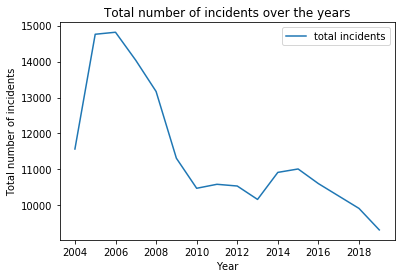

In [36]:
df_years_total_incidents.plot(kind='line')

plt.title('Total number of incidents over the years')
plt.ylabel('Total number of incidents')
plt.xlabel('Year')

plt.show() # need this line to show the updates made to the figure

In [37]:
df_years_servrity = df_relevant[['INCDATE','SEVERITYCODE']]
df_years_servrity['INCDATE'] = df_years_servrity['INCDATE'].str[:4]
df_years_servrity = df_years_servrity.rename(columns = {'INCDATE': 'Year'}, inplace = False)
df_years_servrity = df_years_servrity.set_index('Year')
df_years_servrity

/Users/hammad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SEVERITYCODE
Year,
2013,2
2006,1
2004,1
2013,1
2004,2
...,...
2018,2
2018,1
2019,2


In [38]:
df_years_servrity_total = df_years_servrity.groupby([ 'Year', 'SEVERITYCODE']).size().unstack(fill_value=0)
df_years_servrity_total = df_years_servrity_total.drop(['2020'])

df_years_servrity_total.rename(columns={ df_years_servrity_total.columns[0]: "severity code 1 total", df_years_servrity_total.columns[1]: "severity code 2 total" }, inplace = True)
df_years_servrity_total

SEVERITYCODE,severity code 1 total,severity code 2 total
Year,,
2004,7987,3581
2005,10396,4364
2006,10567,4249
2007,10112,3923
2008,9502,3667
2009,7998,3314
2010,7307,3169
2011,7541,3046
2012,7158,3381


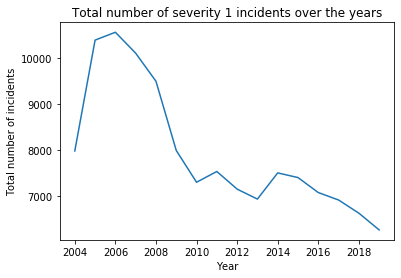

In [39]:

df_years_servrity_1_total = df_years_servrity_total['severity code 1 total']
# df_years_servrity_1_total
# df_years_servrity_1_total
df_years_servrity_1_total.plot(kind='line')

plt.title('Total number of severity 1 incidents over the years')
plt.ylabel('Total number of incidents')
plt.xlabel('Year')

plt.show() # need this line to show the updates made to the figure

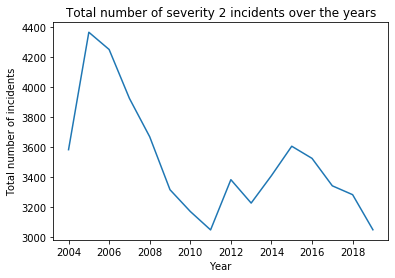

In [40]:
df_years_servrity_2_total = df_years_servrity_total['severity code 2 total']
# df_years_servrity_1_total
# df_years_servrity_1_total
df_years_servrity_2_total.plot(kind='line')

plt.title('Total number of severity 2 incidents over the years')
plt.ylabel('Total number of incidents')
plt.xlabel('Year')

plt.show() # need this line to show the updates made to the figure

# Cleaning data

In [41]:
dummy_variable_addrtype = pd.get_dummies(df_relevant["ADDRTYPE"])
# merge data frame "df" and "dummy_variable_1" 
df_relevant = pd.concat([df_relevant, dummy_variable_addrtype], axis=1)

# drop original column "fuel-type" from "df"
df_relevant.drop('ADDRTYPE', axis = 1, inplace=True)
df_relevant

,SEVERITYCODE,X,Y,INTKEY,LOCATION,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEGLANEKEY,CROSSWALKKEY,Block,Intersection
0,2,-122.323148,47.703140,37475.0,5TH AVE NE AND NE 103RD ST,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,0,0,1
1,1,-122.347294,47.647172,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,0,1,0
2,1,-122.334540,47.607871,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,0,1,0
3,1,-122.334803,47.604803,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,0,1,0
4,2,-122.306426,47.545739,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,0,1,0
194669,1,-122.344526,47.690924,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),1,0,Raining,Wet,Daylight,0,0,0,1,0
194670,2,-122.306689,47.683047,24760.0,20TH AVE NE AND NE 75TH ST,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),0,0,Clear,Dry,Daylight,0,0,0,0,1
194671,2,-122.355317,47.678734,24349.0,GREENWOOD AVE N AND N 68TH ST,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),0,0,Clear,Dry,Dusk,0,4308,0,0,1


In [42]:
df_relevant = df_relevant.dropna(subset=['JUNCTIONTYPE'])
df_relevant['JUNCTIONTYPE'].isna().sum() 
indexNames_Unknowns = df_relevant[ df_relevant['JUNCTIONTYPE'] == 'Unknown' ].index
df_relevant.drop(indexNames_Unknowns , inplace=True)
df_relevant['JUNCTIONTYPE'].value_counts()

dummy_variable_junction_type = pd.get_dummies(df_relevant["JUNCTIONTYPE"])
# merge data frame "df" and "dummy_variable_1" 
df_relevant = pd.concat([df_relevant, dummy_variable_junction_type], axis=1)

# drop original column "fuel-type" from "df"
df_relevant.drop('JUNCTIONTYPE', axis = 1, inplace=True)
df_relevant

/Users/hammad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE,X,Y,INTKEY,LOCATION,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,...,SEGLANEKEY,CROSSWALKKEY,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,2,-122.323148,47.703140,37475.0,5TH AVE NE AND NE 103RD ST,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,0,0,Overcast,...,0,0,0,1,0,1,0,0,0,0
1,1,-122.347294,47.647172,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,0,Raining,...,0,0,1,0,0,0,0,0,1,0
2,1,-122.334540,47.607871,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,0,Overcast,...,0,0,1,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,0,0,Clear,...,0,0,1,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,0,Raining,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,0,0,Clear,...,0,0,1,0,0,0,0,0,1,0
194669,1,-122.344526,47.690924,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,1,0,Raining,...,0,0,1,0,0,0,0,0,1,0
194670,2,-122.306689,47.683047,24760.0,20TH AVE NE AND NE 75TH ST,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,0,0,Clear,...,0,0,0,1,0,1,0,0,0,0
194671,2,-122.355317,47.678734,24349.0,GREENWOOD AVE N AND N 68TH ST,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,0,0,Clear,...,4308,0,0,1,0,1,0,0,0,0


In [43]:
df_relevant = df_relevant.dropna(subset=['WEATHER'])
df_relevant['WEATHER'].isna().sum() 
indexNames_Unknowns_weather = df_relevant[ df_relevant['WEATHER'] == 'Unknown' ].index
df_relevant.drop(indexNames_Unknowns_weather , inplace=True)

indexNames_OTHER_weather = df_relevant[ df_relevant['WEATHER'] == 'Other' ].index
df_relevant.drop(indexNames_OTHER_weather , inplace=True)

df_relevant['WEATHER'].value_counts()

dummy_variable_weather = pd.get_dummies(df_relevant["WEATHER"])
# merge data frame "df" and "dummy_variable_1" 
df_relevant = pd.concat([df_relevant, dummy_variable_weather], axis=1)

# drop original column "fuel-type" from "df"
df_relevant.drop('WEATHER', axis = 1, inplace=True)
df_relevant

/Users/hammad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE,X,Y,INTKEY,LOCATION,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,ROADCOND,...,Ramp Junction,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,-122.323148,47.703140,37475.0,5TH AVE NE AND NE 103RD ST,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,0,0,Wet,...,0,0,0,0,1,0,0,0,0,0
1,1,-122.347294,47.647172,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,0,Wet,...,0,0,0,0,0,0,1,0,0,0
2,1,-122.334540,47.607871,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,0,Dry,...,0,0,0,0,1,0,0,0,0,0
3,1,-122.334803,47.604803,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,0,0,Dry,...,0,0,1,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,0,Wet,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,0,0,Dry,...,0,0,1,0,0,0,0,0,0,0
194669,1,-122.344526,47.690924,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,1,0,Wet,...,0,0,0,0,0,0,1,0,0,0
194670,2,-122.306689,47.683047,24760.0,20TH AVE NE AND NE 75TH ST,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,0,0,Dry,...,0,0,1,0,0,0,0,0,0,0
194671,2,-122.355317,47.678734,24349.0,GREENWOOD AVE N AND N 68TH ST,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,0,0,Dry,...,0,0,1,0,0,0,0,0,0,0


In [44]:
df_relevant['ROADCOND'].unique()
df_relevant = df_relevant.dropna(subset=['ROADCOND'])
df_relevant['ROADCOND'].isna().sum() 

indexNames_Unknowns_ROADCOND = df_relevant[ df_relevant['ROADCOND'] == 'Unknown' ].index
df_relevant.drop(indexNames_Unknowns_ROADCOND , inplace=True)

indexNames_OTHER_ROADCOND = df_relevant[ df_relevant['ROADCOND'] == 'Other' ].index
df_relevant.drop(indexNames_OTHER_ROADCOND , inplace=True)

df_relevant['ROADCOND'].value_counts()

dummy_variable_ROADCOND = pd.get_dummies(df_relevant["ROADCOND"])
# merge data frame "df" and "dummy_variable_1" 
df_relevant = pd.concat([df_relevant, dummy_variable_ROADCOND], axis=1)

# drop original column "fuel-type" from "df"
df_relevant.drop('ROADCOND', axis = 1, inplace=True)
df_relevant

/Users/hammad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE,X,Y,INTKEY,LOCATION,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,LIGHTCOND,...,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,2,-122.323148,47.703140,37475.0,5TH AVE NE AND NE 103RD ST,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,0,0,Daylight,...,0,0,0,0,0,0,0,0,0,1
1,1,-122.347294,47.647172,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,0,Dark - Street Lights On,...,0,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,0,Daylight,...,0,0,0,1,0,0,0,0,0,0
3,1,-122.334803,47.604803,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,0,0,Daylight,...,0,0,0,1,0,0,0,0,0,0
4,2,-122.306426,47.545739,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,0,Daylight,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,0,0,Daylight,...,0,0,0,1,0,0,0,0,0,0
194669,1,-122.344526,47.690924,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,1,0,Daylight,...,0,0,0,0,0,0,0,0,0,1
194670,2,-122.306689,47.683047,24760.0,20TH AVE NE AND NE 75TH ST,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,0,0,Daylight,...,0,0,0,1,0,0,0,0,0,0
194671,2,-122.355317,47.678734,24349.0,GREENWOOD AVE N AND N 68TH ST,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,0,0,Dusk,...,0,0,0,1,0,0,0,0,0,0


In [45]:
df_relevant['LIGHTCOND'].unique()
df_relevant = df_relevant.dropna(subset=['LIGHTCOND'])
df_relevant['LIGHTCOND'].isna().sum() 

indexNames_Unknowns_LIGHTCOND = df_relevant[ df_relevant['LIGHTCOND'] == 'Unknown' ].index
df_relevant.drop(indexNames_Unknowns_LIGHTCOND , inplace=True)

indexNames_OTHER_LIGHTCOND = df_relevant[ df_relevant['LIGHTCOND'] == 'Other' ].index
df_relevant.drop(indexNames_OTHER_LIGHTCOND , inplace=True)

df_relevant['LIGHTCOND'].value_counts()

dummy_variable_LIGHTCOND = pd.get_dummies(df_relevant["LIGHTCOND"])
# merge data frame "df" and "dummy_variable_1" 
df_relevant = pd.concat([df_relevant, dummy_variable_LIGHTCOND], axis=1)

# drop original column "fuel-type" from "df"
df_relevant.drop('LIGHTCOND', axis = 1, inplace=True)
df_relevant

/Users/hammad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE,X,Y,INTKEY,LOCATION,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,SPEEDING,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,-122.323148,47.703140,37475.0,5TH AVE NE AND NE 103RD ST,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,-122.347294,47.647172,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,-122.334540,47.607871,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,0,0,0,...,0,0,0,0,0,0,0,0,1,0
194669,1,-122.344526,47.690924,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,1,0,0,...,0,0,1,0,0,0,0,0,1,0
194670,2,-122.306689,47.683047,24760.0,20TH AVE NE AND NE 75TH ST,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,0,0,0,...,0,0,0,0,0,0,0,0,1,0
194671,2,-122.355317,47.678734,24349.0,GREENWOOD AVE N AND N 68TH ST,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
Y = df_relevant['SEVERITYCODE']
Y

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 164090, dtype: int64

In [47]:
df_relevant = df_relevant.drop(['SEVERITYCODE', 'INTKEY','LOCATION','INCDATE','INCDTTM'], axis=1)

In [48]:
X = df_relevant
X

,X,Y,INATTENTIONIND,UNDERINFL,SPEEDING,SEGLANEKEY,CROSSWALKKEY,Block,Intersection,At Intersection (but not related to intersection),...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,-122.323148,47.703140,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,-122.347294,47.647172,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,-122.334540,47.607871,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-122.334803,47.604803,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-122.306426,47.545739,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
194669,-122.344526,47.690924,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
194670,-122.306689,47.683047,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
194671,-122.355317,47.678734,0,0,0,4308,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (131272, 38) (131272,)
Test set: (32818, 38) (32818,)


# KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [409]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.61000061, 0.66746907, 0.63705893, 0.67325858, 0.65241636,
       0.67795112, 0.66061308, 0.68069352, 0.66893168])

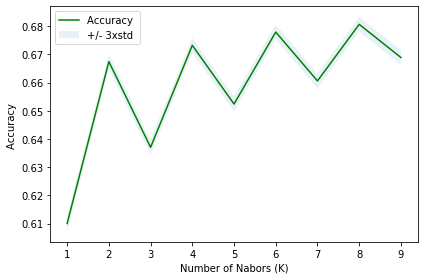

In [410]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [411]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6806935218477664 with k= 8


In [51]:
    neigh_with_best_k = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
    yhat_knn=neigh_with_best_k.predict(X_test)

# Descision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
car_severity_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
car_severity_tree.fit(X_train,y_train)
predTree = car_severity_tree.predict(X_test)
print("car_severity_tree's Accuracy: ", metrics.accuracy_score(y_test, predTree))

car_severity_tree's Accuracy:  0.6982448656225242


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [60]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)

# SVM

In [61]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat_SVM = clf.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [ ]:
print("f1 score knn:" f1_score(y_test, yhat_knn, average='weighted') )
print("f1 score decision tree:" f1_score(y_test, predTree, average='weighted') )
print("f1 score logistic regression:" f1_score(y_test, yhat_LR, average='weighted') )
print("f1 score svm:" f1_score(y_test, yhat_SVM, average='weighted') )

In [ ]:
print("jaccard knn:" jaccard_similarity_score(y_test, yhat_knn))
print("jaccard decision tree:" jaccard_similarity_score(y_test, predTree))
print("jaccard logistic regression:" jaccard_similarity_score(y_test, yhat_LR))
print("jaccard svm:" jaccard_similarity_score(y_test, yhat_SVM))